# Analise dos dados - Filmes e programas de TV da Netflix 2021

In [1]:
# importando bibliotecas
import pandas as pd
import seaborn as srn
import matplotlib.pyplot as plt
import matplotlib as mat
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Lendo o arquivo CSV e conhecendo os dados

In [2]:
dataset = pd.read_csv('netflixData.csv')

In [3]:
dataset.head()

,Show Id,Title,Description,Director,Genres,Cast,Production Country,Release Date,Rating,Duration,Imdb Score,Content Type,Date Added
0,cc1b6ed9-cf9e-4057-8303-34577fb54477,(Un)Well,This docuseries takes a deep dive into the luc...,NaN,Reality TV,NaN,United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
1,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,#Alive,"As a grisly virus rampages a city, a lone man ...",Cho Il,"Horror Movies, International Movies, Thrillers","Yoo Ah-in, Park Shin-hye",South Korea,2020.0,TV-MA,99 min,6.2/10,Movie,"September 8, 2020"
2,b01b73b7-81f6-47a7-86d8-acb63080d525,#AnneFrank - Parallel Stories,"Through her diary, Anne Frank's story is retol...","Sabina Fedeli, Anna Migotto","Documentaries, International Movies","Helen Mirren, Gengher Gatti",Italy,2019.0,TV-14,95 min,6.4/10,Movie,"July 1, 2020"
3,b6611af0-f53c-4a08-9ffa-9716dc57eb9c,#blackAF,Kenya Barris and his family navigate relations...,NaN,TV Comedies,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
4,7f2d4170-bab8-4d75-adc2-197f7124c070,#cats_the_mewvie,This pawesome documentary explores how our fel...,Michael Margolis,"Documentaries, International Movies",NaN,Canada,2020.0,TV-14,90 min,5.1/10,Movie,"February 5, 2020"


In [4]:
dataset.shape

(5967, 13)

In [5]:
dataset.columns = ['ID', 'Título', 'Descrição', 'Diretor', 'Gênero', 'Elenco', 'País', 'Lançamento', 'Classificação', 'Duração', 'IMDB', 'Tipo', 'DataAdicionado']
dataset.head(1)

,ID,Título,Descrição,Diretor,Gênero,Elenco,País,Lançamento,Classificação,Duração,IMDB,Tipo,DataAdicionado
0,cc1b6ed9-cf9e-4057-8303-34577fb54477,(Un)Well,This docuseries takes a deep dive into the luc...,NaN,Reality TV,NaN,United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5967 entries, 0 to 5966
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              5967 non-null   object 
 1   Título          5967 non-null   object 
 2   Descrição       5967 non-null   object 
 3   Diretor         3903 non-null   object 
 4   Gênero          5967 non-null   object 
 5   Elenco          5437 non-null   object 
 6   País            5408 non-null   object 
 7   Lançamento      5964 non-null   float64
 8   Classificação   5963 non-null   object 
 9   Duração         5964 non-null   object 
 10  IMDB            5359 non-null   object 
 11  Tipo            5967 non-null   object 
 12  DataAdicionado  4632 non-null   object 
dtypes: float64(1), object(12)
memory usage: 606.1+ KB


In [7]:
dataset.describe()

,Lançamento
count,5964.000000
mean,2015.643863
std,7.257391
min,1925.000000
25%,2015.000000
50%,2018.000000
75%,2019.000000
max,2021.000000


In [8]:
dataset.isnull()

,ID,Título,Descrição,Diretor,Gênero,Elenco,País,Lançamento,Classificação,Duração,IMDB,Tipo,DataAdicionado
0,False,False,False,True,False,True,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5962,False,False,False,False,False,False,False,False,False,False,False,False,False
5963,False,False,False,True,False,False,True,False,False,False,True,False,True
5964,False,False,False,True,False,False,True,False,False,False,True,False,True
5965,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
total_null=dataset.isnull().sum() 
total_null

ID                   0
Título               0
Descrição            0
Diretor           2064
Gênero               0
Elenco             530
País               559
Lançamento           3
Classificação        4
Duração              3
IMDB               608
Tipo                 0
DataAdicionado    1335
dtype: int64

In [10]:
print(round(total_null*100/len(dataset),2))

ID                 0.00
Título             0.00
Descrição          0.00
Diretor           34.59
Gênero             0.00
Elenco             8.88
País               9.37
Lançamento         0.05
Classificação      0.07
Duração            0.05
IMDB              10.19
Tipo               0.00
DataAdicionado    22.37
dtype: float64


## Explorando as categorias e tratando

## Categoria Título

In [11]:
#explorar dados categoricos
#Título
agrupado = dataset.groupby(['Título']).size()
agrupado

Título
#Alive                                 1
#AnneFrank - Parallel Stories          1
#FriendButMarried                      1
#FriendButMarried 2                    1
#Rucker50                              1
                                      ..
​SAINT SEIYA: Knights of the Zodiac    1
​​Kuch Bheege Alfaaz                   1
海的儿子                                   1
반드시 잡는다                                1
최강전사 미니특공대 : 영웅의 탄생                    1
Length: 5897, dtype: int64

In [12]:
dataset['Título'].isnull().sum()

0

In [13]:
dataset['Título'] = dataset['Título'].str.replace('#','')

In [14]:
dataset['Título'].head(2)

0    (Un)Well
1       Alive
Name: Título, dtype: object

## Descrição

In [15]:
#explorar dados categoricos
#Descrição
dataset['Descrição'].head(2)

0    This docuseries takes a deep dive into the luc...
1    As a grisly virus rampages a city, a lone man ...
Name: Descrição, dtype: object

In [16]:
dataset['Descrição'].isnull().sum()

0

In [17]:
#Deletando a coluna Descrição, visto não ter necessidade na analise atual que estamos realizando
dataset.drop(columns=['Descrição'], inplace = True)
dataset.head(2)

,ID,Título,Diretor,Gênero,Elenco,País,Lançamento,Classificação,Duração,IMDB,Tipo,DataAdicionado
0,cc1b6ed9-cf9e-4057-8303-34577fb54477,(Un)Well,NaN,Reality TV,NaN,United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
1,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,Alive,Cho Il,"Horror Movies, International Movies, Thrillers","Yoo Ah-in, Park Shin-hye",South Korea,2020.0,TV-MA,99 min,6.2/10,Movie,"September 8, 2020"


In [18]:
#Deletando a coluna Descrição, visto não ter necessidade na analise atual que estamos realizando
dataset.drop(columns=['DataAdicionado'], inplace = True)
dataset.head(2)

,ID,Título,Diretor,Gênero,Elenco,País,Lançamento,Classificação,Duração,IMDB,Tipo
0,cc1b6ed9-cf9e-4057-8303-34577fb54477,(Un)Well,NaN,Reality TV,NaN,United States,2020.0,TV-MA,1 Season,6.6/10,TV Show
1,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,Alive,Cho Il,"Horror Movies, International Movies, Thrillers","Yoo Ah-in, Park Shin-hye",South Korea,2020.0,TV-MA,99 min,6.2/10,Movie


## Categoria Diretor

In [19]:
#explorar dados categoricos
#Diretor
dataset['Diretor'].isnull().sum()

2064

In [20]:
# Tratando as colunas Diretor colocando no lugar de null o valor "Não Informado"
dataset["Diretor"].fillna("Não Informado", inplace=True)

In [21]:
agrupado = dataset.groupby(['Diretor']).size()
agrupado

Diretor
A. L. Vijay              1
A. Raajdheep             1
A. Salaam                1
A.R. Murugadoss          3
Aadish Keluskar          1
                        ..
Ángel Gómez Hernández    1
Ángeles Reiné            1
Ísold Uggadóttir         1
Ömer Faruk Sorak         1
Şenol Sönmez             2
Length: 2994, dtype: int64

## Categoria Gênero

In [22]:
#explorar dados categoricos
#Gênero
dataset['Gênero'].isnull().sum()

0

In [23]:
dataset['Gênero'].head()

0                                        Reality TV
1    Horror Movies, International Movies, Thrillers
2               Documentaries, International Movies
3                                       TV Comedies
4               Documentaries, International Movies
Name: Gênero, dtype: object

In [24]:
agrupado2 = dataset.groupby(['Gênero']).size()
agrupado2

Gênero
Action & Adventure                                              65
Action & Adventure, Anime Features, Children & Family Movies     3
Action & Adventure, Anime Features, Classic Movies               2
Action & Adventure, Anime Features, Horror Movies                1
Action & Adventure, Anime Features, International Movies        31
                                                                ..
TV Horror, TV Mysteries, Teen TV Shows                           1
TV Horror, Teen TV Shows                                         2
TV Sci-Fi & Fantasy, TV Thrillers                                1
TV Shows                                                         9
Thrillers                                                       33
Length: 433, dtype: int64

## Categoria Elenco

In [25]:
#explorar dados categoricos
#Elenco
dataset['Elenco'].isnull().sum()

530

In [26]:
# Tratando as colunas Elenco colocando no lugar de null o valor "Não Informado"
dataset["Elenco"].fillna("Não Informado", inplace=True)

In [27]:
dataset["Elenco"].head(2)

0               Não Informado
1    Yoo Ah-in, Park Shin-hye
Name: Elenco, dtype: object

In [28]:
#Deletando a categoria Elenco, visto não ter necessidade na analise atual que estamos realizando
dataset.drop(columns=['Elenco'], inplace = True)
dataset.head(2)

,ID,Título,Diretor,Gênero,País,Lançamento,Classificação,Duração,IMDB,Tipo
0,cc1b6ed9-cf9e-4057-8303-34577fb54477,(Un)Well,Não Informado,Reality TV,United States,2020.0,TV-MA,1 Season,6.6/10,TV Show
1,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,Alive,Cho Il,"Horror Movies, International Movies, Thrillers",South Korea,2020.0,TV-MA,99 min,6.2/10,Movie


## Categoria País

In [29]:
#explorar dados categoricos
#País
dataset['País'].isnull().sum()

559

In [30]:
# Tratando a categoria País, colocando no lugar de null o valor "Não Informado"

dataset["País"].fillna("Não Informado", inplace=True)
dataset.head(2)

,ID,Título,Diretor,Gênero,País,Lançamento,Classificação,Duração,IMDB,Tipo
0,cc1b6ed9-cf9e-4057-8303-34577fb54477,(Un)Well,Não Informado,Reality TV,United States,2020.0,TV-MA,1 Season,6.6/10,TV Show
1,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,Alive,Cho Il,"Horror Movies, International Movies, Thrillers",South Korea,2020.0,TV-MA,99 min,6.2/10,Movie


In [31]:
agrupado3 = dataset.groupby(['País']).size()
agrupado3

País
Argentina                                              40
Argentina, Brazil, France, Poland, Germany, Denmark     1
Argentina, Chile                                        1
Argentina, France                                       1
Argentina, Italy                                        2
                                                       ..
Uruguay, Guatemala                                      1
Uruguay, Spain, Mexico                                  1
Vietnam                                                 4
West Germany                                            1
Zimbabwe                                                1
Length: 510, dtype: int64

## Categoria Lançamento

In [32]:
#explorar coluna de Data
#Lançamento
dataset['Lançamento'].describe()

count    5964.000000
mean     2015.643863
std         7.257391
min      1925.000000
25%      2015.000000
50%      2018.000000
75%      2019.000000
max      2021.000000
Name: Lançamento, dtype: float64

In [33]:
dataset['Lançamento'].isnull().sum()

3

In [34]:
dataset['Lançamento'] = pd.to_datetime(dataset['Lançamento'], format='%Y') 
dataset['Lançamento'].head()

0   2020-01-01
1   2020-01-01
2   2019-01-01
3   2020-01-01
4   2020-01-01
Name: Lançamento, dtype: datetime64[ns]

In [35]:
#Tratando a coluna lançamento e colocando a mediana no valores null
dataset["Lançamento"].fillna(dataset['Lançamento'].median(), inplace=True)
dataset['Lançamento'].isnull().sum()

0

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Lançamento')

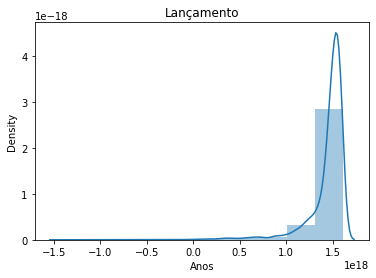

In [36]:
srn.distplot(dataset['Lançamento'], bins = 10, axlabel = 'Anos').set_title('Lançamento')

Text(0.5, 0, 'Anos')

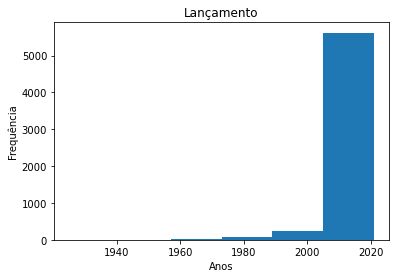

In [37]:
# Visualização do histograma com 6 divisões (bins)
plt.hist(dataset['Lançamento'], bins = 6)
plt.title('Lançamento')
plt.ylabel('Frequência')
plt.xlabel('Anos')

## Categoria Classificação

In [38]:
dataset['Classificação'].head()

0    TV-MA
1    TV-MA
2    TV-14
3    TV-MA
4    TV-14
Name: Classificação, dtype: object

In [39]:
dataset['Classificação'].unique()

array(['TV-MA', 'TV-14', 'TV-G', 'TV-PG', 'TV-Y', 'R', 'PG-13', 'TV-Y7',
       'PG', 'G', nan, 'NC-17'], dtype=object)

In [40]:
dataset['Classificação'] = dataset['Classificação'].str.replace('TV-MA' or 'PG' or 'TV-Y7','Orientação dos Responsáveis')
dataset['Classificação'] = dataset['Classificação'].str.replace('TV-14' or 'PG-13','Orientação dos Responsáveis-13')
dataset['Classificação'] = dataset['Classificação'].str.replace('TV-G' or 'G','Todas as Idades')
dataset['Classificação'] = dataset['Classificação'].str.replace('TV-PG' or 'R','Restrito')
dataset['Classificação'] = dataset['Classificação'].str.replace('TV-Y','Conteúdo infantil')
dataset['Classificação'] = dataset['Classificação'].str.replace('NC-17','Apenas adultos')
dataset["Classificação"].fillna("Não Informada", inplace=True)
dataset.head()


,ID,Título,Diretor,Gênero,País,Lançamento,Classificação,Duração,IMDB,Tipo
0,cc1b6ed9-cf9e-4057-8303-34577fb54477,(Un)Well,Não Informado,Reality TV,United States,2020-01-01,Orientação dos Responsáveis,1 Season,6.6/10,TV Show
1,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,Alive,Cho Il,"Horror Movies, International Movies, Thrillers",South Korea,2020-01-01,Orientação dos Responsáveis,99 min,6.2/10,Movie
2,b01b73b7-81f6-47a7-86d8-acb63080d525,AnneFrank - Parallel Stories,"Sabina Fedeli, Anna Migotto","Documentaries, International Movies",Italy,2019-01-01,Orientação dos Responsáveis-13,95 min,6.4/10,Movie
3,b6611af0-f53c-4a08-9ffa-9716dc57eb9c,blackAF,Não Informado,TV Comedies,United States,2020-01-01,Orientação dos Responsáveis,1 Season,6.6/10,TV Show
4,7f2d4170-bab8-4d75-adc2-197f7124c070,cats_the_mewvie,Michael Margolis,"Documentaries, International Movies",Canada,2020-01-01,Orientação dos Responsáveis-13,90 min,5.1/10,Movie


In [41]:
dataset['Classificação'].isnull().sum()

0

## Categoria IMDB

In [42]:
dataset["IMDB"].describe()

count       5359
unique        79
top       7.1/10
freq         233
Name: IMDB, dtype: object

In [43]:
dataset["IMDB"].unique()

array(['6.6/10', '6.2/10', '6.4/10', '5.1/10', '7.0/10', '5.8/10',
       '6.0/10', '6.1/10', '7.5/10', '5.5/10', '7.6/10', '6.5/10',
       '6.7/10', '7.4/10', '7.7/10', '8.3/10', '5.9/10', '6.9/10', nan,
       '5.7/10', '7.9/10', '6.8/10', '4.8/10', '8.4/10', '4.7/10',
       '3.5/10', '7.2/10', '3.8/10', '4.4/10', '1.9/10', '6.3/10',
       '3.2/10', '4.6/10', '5.2/10', '5.3/10', '5.6/10', '4.0/10',
       '7.3/10', '5.0/10', '4.5/10', '2.0/10', '8.0/10', '8.8/10',
       '8.1/10', '7.8/10', '8.5/10', '5.4/10', '4.9/10', '7.1/10',
       '1.3/10', '4.1/10', '8.2/10', '2.8/10', '3.1/10', '2.5/10',
       '4.2/10', '2.4/10', '4.3/10', '8.6/10', '3.9/10', '3.0/10',
       '8.7/10', '9.0/10', '9.3/10', '2.3/10', '2.6/10', '3.7/10',
       '3.4/10', '8.9/10', '3.3/10', '9.4/10', '3.6/10', '9.1/10',
       '2.9/10', '2.2/10', '1.8/10', '2.7/10', '2.1/10', '9.2/10',
       '1.7/10'], dtype=object)

In [44]:
dataset['IMDB'] = dataset['IMDB'].str.replace('/10','')
dataset["IMDB"].unique()

array(['6.6', '6.2', '6.4', '5.1', '7.0', '5.8', '6.0', '6.1', '7.5',
       '5.5', '7.6', '6.5', '6.7', '7.4', '7.7', '8.3', '5.9', '6.9', nan,
       '5.7', '7.9', '6.8', '4.8', '8.4', '4.7', '3.5', '7.2', '3.8',
       '4.4', '1.9', '6.3', '3.2', '4.6', '5.2', '5.3', '5.6', '4.0',
       '7.3', '5.0', '4.5', '2.0', '8.0', '8.8', '8.1', '7.8', '8.5',
       '5.4', '4.9', '7.1', '1.3', '4.1', '8.2', '2.8', '3.1', '2.5',
       '4.2', '2.4', '4.3', '8.6', '3.9', '3.0', '8.7', '9.0', '9.3',
       '2.3', '2.6', '3.7', '3.4', '8.9', '3.3', '9.4', '3.6', '9.1',
       '2.9', '2.2', '1.8', '2.7', '2.1', '9.2', '1.7'], dtype=object)

In [45]:
dataset['IMDB'] = pd.to_numeric(dataset['IMDB'],errors = 'coerce')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5967 entries, 0 to 5966
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             5967 non-null   object        
 1   Título         5967 non-null   object        
 2   Diretor        5967 non-null   object        
 3   Gênero         5967 non-null   object        
 4   País           5967 non-null   object        
 5   Lançamento     5967 non-null   datetime64[ns]
 6   Classificação  5967 non-null   object        
 7   Duração        5964 non-null   object        
 8   IMDB           5359 non-null   float64       
 9   Tipo           5967 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 466.3+ KB


In [46]:
dataset['IMDB'].isnull().sum()

608

In [47]:
# Excluindo linha que não tem nota
dataset = dataset[dataset['IMDB'].notna()]
dataset["IMDB"].describe()

count    5359.000000
mean        6.558985
std         1.173941
min         1.300000
25%         5.900000
50%         6.700000
75%         7.400000
max         9.400000
Name: IMDB, dtype: float64

In [48]:
dataset['IMDB'].isnull().sum()

0

In [49]:
a = dataset['IMDB'].median()
b = dataset['IMDB'].mean()
print("A Mediana é {} e a Media é {}".format(a,b))

A Mediana é 6.7 e a Media é 6.558984885239767


Text(0.5, 0, 'Nota')

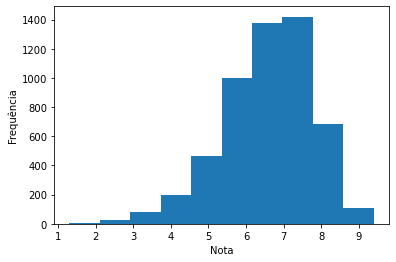

In [50]:
# Histograma com a duração das Filmes (Duração)
dataset['IMDB'].plot(kind='hist')
plt.title('')
plt.ylabel('Frequência')
plt.xlabel('Nota')

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='IMDB', ylabel='Density'>

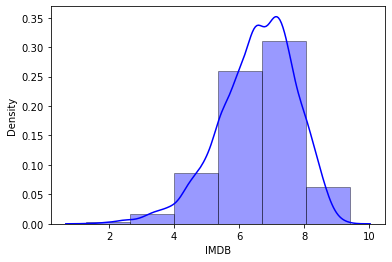

In [51]:
#densidade e histograma
srn.distplot(dataset['IMDB'], hist = True, kde = True,
             bins = 6, color = 'blue',
             hist_kws={'edgecolor': 'black'})

## Dividindo a tabela por Tipo e resetando o index - Filmes e Series

In [52]:
dataset["Tipo"].unique()

array(['TV Show', 'Movie'], dtype=object)

In [53]:
#Dividindo a Tabela por Tipo
series = dataset[dataset['Tipo'].str.contains('TV Show')]
filmes = dataset[dataset['Tipo'].str.contains('Movie')]

In [54]:
#Reset no index das duas novas tabelas
filmes = filmes.reset_index(drop=True)
series = series.reset_index(drop=True)

In [55]:
filmes.head(2)

,ID,Título,Diretor,Gênero,País,Lançamento,Classificação,Duração,IMDB,Tipo
0,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,Alive,Cho Il,"Horror Movies, International Movies, Thrillers",South Korea,2020-01-01,Orientação dos Responsáveis,99 min,6.2,Movie
1,b01b73b7-81f6-47a7-86d8-acb63080d525,AnneFrank - Parallel Stories,"Sabina Fedeli, Anna Migotto","Documentaries, International Movies",Italy,2019-01-01,Orientação dos Responsáveis-13,95 min,6.4,Movie


In [56]:
series.head(2)

,ID,Título,Diretor,Gênero,País,Lançamento,Classificação,Duração,IMDB,Tipo
0,cc1b6ed9-cf9e-4057-8303-34577fb54477,(Un)Well,Não Informado,Reality TV,United States,2020-01-01,Orientação dos Responsáveis,1 Season,6.6,TV Show
1,b6611af0-f53c-4a08-9ffa-9716dc57eb9c,blackAF,Não Informado,TV Comedies,United States,2020-01-01,Orientação dos Responsáveis,1 Season,6.6,TV Show


## Categoria Duração - tabela filme

In [57]:
filmes['Duração'].head()

0     99 min
1     95 min
2     90 min
3    102 min
4    104 min
Name: Duração, dtype: object

In [58]:
filmes['Duração'].isnull().sum()

0

In [59]:
filmes['Duração'] = filmes['Duração'].str.replace('min','')

In [60]:
filmes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3551 entries, 0 to 3550
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             3551 non-null   object        
 1   Título         3551 non-null   object        
 2   Diretor        3551 non-null   object        
 3   Gênero         3551 non-null   object        
 4   País           3551 non-null   object        
 5   Lançamento     3551 non-null   datetime64[ns]
 6   Classificação  3551 non-null   object        
 7   Duração        3551 non-null   object        
 8   IMDB           3551 non-null   float64       
 9   Tipo           3551 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 277.5+ KB


In [61]:
filmes['Duração'] = pd.to_numeric(filmes['Duração'],errors = 'coerce')
filmes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3551 entries, 0 to 3550
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             3551 non-null   object        
 1   Título         3551 non-null   object        
 2   Diretor        3551 non-null   object        
 3   Gênero         3551 non-null   object        
 4   País           3551 non-null   object        
 5   Lançamento     3551 non-null   datetime64[ns]
 6   Classificação  3551 non-null   object        
 7   Duração        3551 non-null   int64         
 8   IMDB           3551 non-null   float64       
 9   Tipo           3551 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 277.5+ KB


In [62]:
a = filmes['Duração'].median()
b = filmes['Duração'].mean()
print("A Mediana é {} e a Media é {}".format(a,b))

A Mediana é 99.0 e a Media é 100.04139678963672


In [63]:
filmes['Duração'].describe()

count    3551.000000
mean      100.041397
std        28.071091
min         3.000000
25%        87.000000
50%        99.000000
75%       115.000000
max       312.000000
Name: Duração, dtype: float64

In [64]:
h = np.histogram(filmes["Duração"])
h

(array([  88,  259, 1145, 1531,  433,   81,   10,    2,    1,    1],
       dtype=int64),
 array([  3. ,  33.9,  64.8,  95.7, 126.6, 157.5, 188.4, 219.3, 250.2,
        281.1, 312. ]))

Text(0.5, 0, 'Duração')

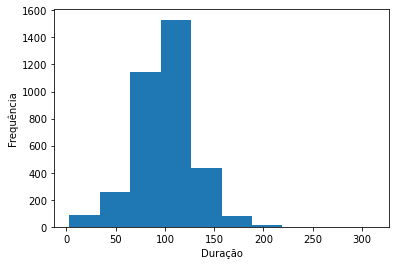

In [65]:
# Histograma com a duração das Filmes (Duração)
filmes['Duração'].plot(kind='hist')
plt.title('')
plt.ylabel('Frequência')
plt.xlabel('Duração')

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Duração')

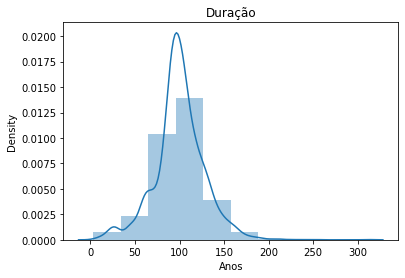

In [66]:
srn.distplot(filmes['Duração'], bins = 10, axlabel = 'Anos').set_title('Duração')

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Duração'>

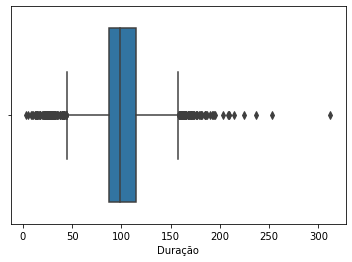

In [67]:
# Verificando como está distribuida as Durações com BOXPLOT
srn.boxplot(filmes['Duração'])

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Lançamento', ylabel='Duração'>

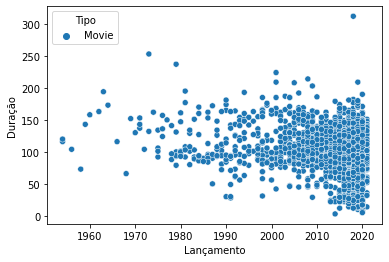

In [68]:
# Gráfico de dispersão utilizando os atributos Lançamento e Duração, agrupamento pelo Tipo
srn.scatterplot(filmes['Lançamento'], filmes['Duração'], hue = filmes["Tipo"])

## Unindo novamente as tabelas

In [69]:
dataset = pd.concat([filmes, series])

In [70]:
dataset

,ID,Título,Diretor,Gênero,País,Lançamento,Classificação,Duração,IMDB,Tipo
0,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,Alive,Cho Il,"Horror Movies, International Movies, Thrillers",South Korea,2020-01-01,Orientação dos Responsáveis,99,6.2,Movie
1,b01b73b7-81f6-47a7-86d8-acb63080d525,AnneFrank - Parallel Stories,"Sabina Fedeli, Anna Migotto","Documentaries, International Movies",Italy,2019-01-01,Orientação dos Responsáveis-13,95,6.4,Movie
2,7f2d4170-bab8-4d75-adc2-197f7124c070,cats_the_mewvie,Michael Margolis,"Documentaries, International Movies",Canada,2020-01-01,Orientação dos Responsáveis-13,90,5.1,Movie
3,c293788a-41f7-49a3-a7fc-005ea33bce2b,FriendButMarried,Rako Prijanto,"Dramas, International Movies, Romantic Movies",Indonesia,2018-01-01,Todas as Idades,102,7.0,Movie
4,0555e67e-f624-4a05-93e4-55c117d0056d,FriendButMarried 2,Rako Prijanto,"Dramas, International Movies, Romantic Movies",Indonesia,2020-01-01,Todas as Idades,104,7.0,Movie
...,...,...,...,...,...,...,...,...,...,...
1803,1952fb4f-8a01-4fd6-adba-0d1600778f90,Zig & Sharko,Não Informado,"Kids' TV, TV Comedies",France,2019-01-01,Conteúdo infantil7,2 Seasons,7.0,TV Show
1804,d143fc8e-0470-4dc8-a65f-5dc59370d776,Zindagi in Short,Não Informado,"International TV Shows, TV Dramas",India,2020-01-01,Orientação dos Responsáveis,1 Season,7.3,TV Show
1805,e4d88cc9-8ee2-46b9-aac6-af786e6efbdb,Zona Rosa,Não Informado,"International TV Shows, Spanish-Language TV Sh...",Mexico,2019-01-01,Orientação dos Responsáveis,1 Season,5.7,TV Show
1806,80bf7986-5698-4d01-bc52-e08a8210b834,Zoo,Não Informado,"TV Dramas, TV Mysteries, TV Sci-Fi & Fantasy",United States,2017-01-01,Orientação dos Responsáveis-13,3 Seasons,6.6,TV Show


In [71]:
#Reset o index
dataset = dataset.reset_index(drop=True)
dataset

,ID,Título,Diretor,Gênero,País,Lançamento,Classificação,Duração,IMDB,Tipo
0,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,Alive,Cho Il,"Horror Movies, International Movies, Thrillers",South Korea,2020-01-01,Orientação dos Responsáveis,99,6.2,Movie
1,b01b73b7-81f6-47a7-86d8-acb63080d525,AnneFrank - Parallel Stories,"Sabina Fedeli, Anna Migotto","Documentaries, International Movies",Italy,2019-01-01,Orientação dos Responsáveis-13,95,6.4,Movie
2,7f2d4170-bab8-4d75-adc2-197f7124c070,cats_the_mewvie,Michael Margolis,"Documentaries, International Movies",Canada,2020-01-01,Orientação dos Responsáveis-13,90,5.1,Movie
3,c293788a-41f7-49a3-a7fc-005ea33bce2b,FriendButMarried,Rako Prijanto,"Dramas, International Movies, Romantic Movies",Indonesia,2018-01-01,Todas as Idades,102,7.0,Movie
4,0555e67e-f624-4a05-93e4-55c117d0056d,FriendButMarried 2,Rako Prijanto,"Dramas, International Movies, Romantic Movies",Indonesia,2020-01-01,Todas as Idades,104,7.0,Movie
...,...,...,...,...,...,...,...,...,...,...
5354,1952fb4f-8a01-4fd6-adba-0d1600778f90,Zig & Sharko,Não Informado,"Kids' TV, TV Comedies",France,2019-01-01,Conteúdo infantil7,2 Seasons,7.0,TV Show
5355,d143fc8e-0470-4dc8-a65f-5dc59370d776,Zindagi in Short,Não Informado,"International TV Shows, TV Dramas",India,2020-01-01,Orientação dos Responsáveis,1 Season,7.3,TV Show
5356,e4d88cc9-8ee2-46b9-aac6-af786e6efbdb,Zona Rosa,Não Informado,"International TV Shows, Spanish-Language TV Sh...",Mexico,2019-01-01,Orientação dos Responsáveis,1 Season,5.7,TV Show
5357,80bf7986-5698-4d01-bc52-e08a8210b834,Zoo,Não Informado,"TV Dramas, TV Mysteries, TV Sci-Fi & Fantasy",United States,2017-01-01,Orientação dos Responsáveis-13,3 Seasons,6.6,TV Show


## Exportando arquivo tratado

In [72]:
dataset.to_csv('dadosnetflix.csv', index = False)